In [1]:
# Assignment 2: Machine Learning

# USE-CASE 1 CHOSEN. 
# Regression-algorithm has been chosen for this assignment.

# Predict stock market price for TESLA. 
# Make a prediction algorithm which predicts the price of this stock on a specific date. 
# Input will be date and output should be price of that stock (close value in the data file). 
# You should also show the prediction percentage score. Data file: TESLA.csv

In [59]:
# The study “Study of Machine learning Algorithms for Stock Market Prediction" made by A. Pathak comes to the conclusion that Regression algorithms are a simple but effective tool to use when predicting stocks. 
# His thesis concludes that regression is far from the best tool. 
# But based on my knowledge of ML, I chose to use regressions. As I later observe, there are perhaps more effective ways to use regressions. 
# Among other things, one could use ARMA models for a more correct result.


# URL for the thesis: https://tinyurl.com/43fnxcut

In [2]:
# Import modules: 

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Import dataset / .csv:

In [4]:
df = pd.read_csv("TSLA.csv")

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-10-26,411.630005,425.760010,410.000000,420.279999,420.279999,28239200
1,2020-10-27,423.760010,430.500000,420.100006,424.679993,424.679993,22686500
2,2020-10-28,416.480011,418.600006,406.000000,406.019989,406.019989,25451400
3,2020-10-29,409.959991,418.059998,406.459991,410.829987,410.829987,22655300
4,2020-10-30,406.899994,407.589996,379.109985,388.040009,388.040009,42511300


In [5]:
# Changing the date-format

In [6]:
df['Date'] = pd.to_datetime(df.Date)

In [7]:
# Finding the total amount of columns

In [8]:
df.shape

(252, 7)

In [9]:
# Removing/Dropping/Hiding the dummie: "Adj Close"

In [10]:
df.drop('Adj Close',axis =1, inplace= True)

In [11]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2020-10-26,411.630005,425.760010,410.000000,420.279999,28239200
1,2020-10-27,423.760010,430.500000,420.100006,424.679993,22686500
2,2020-10-28,416.480011,418.600006,406.000000,406.019989,25451400
3,2020-10-29,409.959991,418.059998,406.459991,410.829987,22655300
4,2020-10-30,406.899994,407.589996,379.109985,388.040009,42511300


In [12]:
# Checking the dataset for null-values

In [13]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [14]:
# We got no unexpected null-values in our dataset

In [15]:
# Finding information about our dataset
# Finding the number of entries, columns etc.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    252 non-null    datetime64[ns]
 1   Open    252 non-null    float64       
 2   High    252 non-null    float64       
 3   Low     252 non-null    float64       
 4   Close   252 non-null    float64       
 5   Volume  252 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.9 KB


<AxesSubplot:>

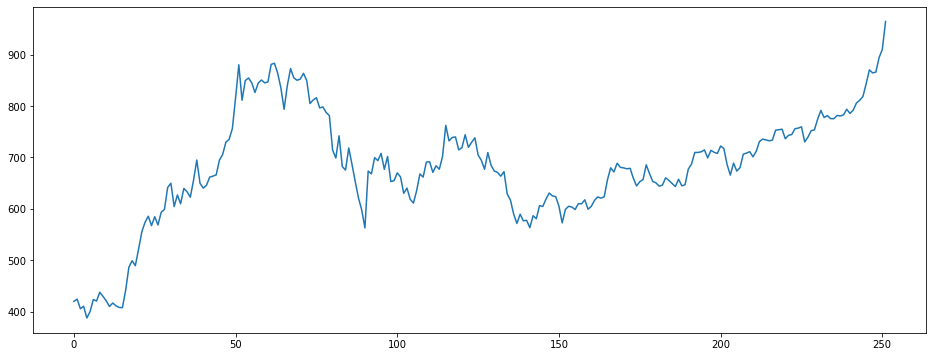

In [17]:
df['Close'].plot(figsize=(16,6))

In [18]:
# Exctract "Close" and "Open, High, Low & Volume" from the dataset

In [19]:
x = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [21]:
#test_size = 0.25 tell the function that 25% of values should be put in test arrat
#Random state is a variable that seeds the random generator. 

In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=0)

In [22]:
# create object for the class

In [23]:
lr = LinearRegression()

In [24]:
# perform linear regression

In [25]:
lr.fit(x_train, y_train)

LinearRegression()

In [26]:
# make predictions

In [27]:
Y_pred = lr.predict(x_train) 

In [28]:
predicted = lr.predict(x_test)

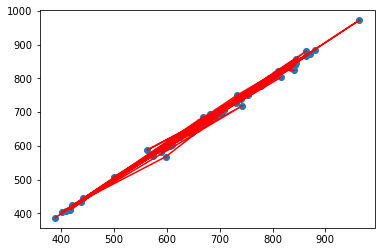

MSE = 63.52211619076644


In [29]:
Y_pred = lr.predict(x_test)  # Predict the model on X_test
plt.scatter(y_test, predicted)
plt.plot(y_test, predicted, color='red')
plt.show()

print( "MSE = "+str(metrics.mean_squared_error(y_test,predicted)))

In [ ]:
# Result: The MSE-value is high which means the the error might be high in our model.

In [ ]:
# Printing r2-score:

In [40]:
print("R2 score = "+str(metrics.r2_score(y_test,predicted)))

R2 score = 0.9953847609693713


In [42]:
# Result: R2 score of 100 means that the two variables are perfectly correlated.
# A score of 99 % is high, and might indicate that the model might be valid, but not in all cases.

In [30]:
# printing out the expected values: 

In [31]:
print(x_test)

           Open        High         Low    Volume
158  612.229980  625.489990  609.179993  20424000
83   726.150024  737.210022  670.580017  39023900
170  679.770020  692.809998  678.140015  18924900
101  675.770020  677.799988  657.510010  30491900
150  620.130005  623.359985  599.140015  23302800
..          ...         ...         ...       ...
116  770.700012  780.789978  728.030029  49017400
61   855.000000  900.400024  838.820007  41173400
124  741.000000  749.299988  732.609985  31038500
52   849.400024  854.429993  803.619995  59301600
66   814.289978  842.000000  795.559998  25391400

[84 rows x 4 columns]


In [32]:
# printing out the trained values: 

In [33]:
print(x_train)

           Open        High         Low    Volume
26   556.440002  571.539978  541.210022  47775700
231  773.119995  799.000000  769.309998  28070700
154  623.010010  623.090027  595.500000  26053400
224  752.830017  758.909973  747.609985  13923400
40   648.000000  649.880005  614.229980  51716000
..          ...         ...         ...       ...
67   844.679993  880.500000  842.200012  24346200
192  700.000000  726.940002  698.400024  33615800
117  743.099976  743.690002  721.309998  27848900
47   719.460022  744.489990  717.190002  48638200
172  678.979980  700.000000  673.260010  27054500

[168 rows x 4 columns]


In [34]:
dframe=pd.DataFrame(y_test,predicted)

In [35]:
dfr=pd.DataFrame({'ActualClose':y_test,'PredictedClose':predicted})

In [36]:
# printing out ActualClose and Predicted close as dfr

In [37]:
print(dfr)

     ActualClose  PredictedClose
158   617.690002      620.184592
83    682.219971      693.399901
170   679.700012      688.784963
101   662.159973      663.525315
150   605.119995      605.350792
..           ...             ...
116   732.229980      749.238889
61    880.799988      885.015858
124   738.200012      742.604031
52    811.190002      822.988250
66    839.809998      824.101793

[84 rows x 2 columns]


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [39]:
lr.score(x_test,y_test)

0.9953847609693713

In [ ]:
# Testing if we might have overfitted our model 

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [50]:
test_prediction = lr.predict(x_test)
print('Mean Squared Error: ', mean_squared_error(y_true=y_test, y_pred=test_prediction))
print('Coefficient of determination: %.2f'
      % r2_score(y_true=y_test, y_pred=test_prediction))

Mean Squared Error:  63.52211619076644
Coefficient of determination: 1.00


In [52]:
# Using this cross-validation, the result it indicates that we might have overfitted our model. 
# For future reference: Use ARMA-models because it might be better when using linear regression on a time series model (Date)

In [53]:
graph=dfr.head(20)

<AxesSubplot:>

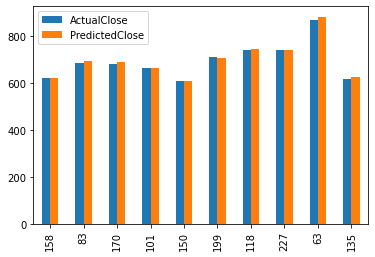

In [54]:
graph.plot(kind='bar')